In [39]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("train_lending_club.csv")

In [4]:
data.describe()

,fico_range_low,total_acc,pub_rec,revol_util,annual_inc,int_rate,dti,mort_acc,loan_amnt,installment,pub_rec_bankruptcies,fico_range_high,revol_bal,id,open_acc,emp_length,loan_status,time_to_earliest_cr_line
count,236846.000000,236846.000000,236846.000000,236846.000000,2.368460e+05,236846.000000,236846.000000,236846.000000,236846.000000,236846.000000,236846.000000,236846.000000,2.368460e+05,2.368460e+05,236846.000000,236846.000000,236846.000000,2.368460e+05
mean,694.352132,25.573229,0.239354,52.846959,7.737953e+04,12.603168,18.533785,1.733278,14626.430888,441.924072,0.138330,698.352271,1.695626e+04,4.926939e+07,11.807512,5.990234,0.831591,5.264205e+05
std,30.932496,12.196168,0.673022,24.012425,7.729067e+04,4.482069,9.214702,2.044617,8611.590744,257.213087,0.391776,30.933176,2.382901e+04,2.098038e+07,5.592320,4.238357,0.374230,2.413121e+05
min,660.000000,2.000000,0.000000,0.000000,0.000000e+00,5.320000,0.000000,0.000000,1000.000000,14.770000,0.000000,664.000000,0.000000e+00,5.670500e+04,0.000000,0.000000,0.000000,9.711360e+04
25%,670.000000,17.000000,0.000000,35.000000,4.600000e+04,9.170000,12.050000,0.000000,8000.000000,254.070000,0.000000,674.000000,6.127000e+03,3.319150e+07,8.000000,2.000000,1.000000,3.603744e+05
50%,685.000000,24.000000,0.000000,53.000000,6.500000e+04,12.290000,17.890000,1.000000,12450.000000,378.200000,0.000000,689.000000,1.139900e+04,5.297922e+07,11.000000,6.000000,1.000000,4.784832e+05
75%,710.000000,32.000000,0.000000,71.200000,9.200000e+04,15.310000,24.520000,3.000000,20000.000000,588.367500,0.000000,714.000000,2.043100e+04,6.664553e+07,15.000000,11.000000,1.000000,6.470496e+05
max,845.000000,169.000000,86.000000,182.800000,9.573072e+06,30.990000,999.000000,47.000000,40000.000000,1534.880000,9.000000,850.000000,2.560703e+06,8.436346e+07,76.000000,11.000000,1.000000,2.240525e+06


In [5]:
data.head()

,issue_d,sub_grade,term,home_ownership,fico_range_low,total_acc,pub_rec,revol_util,annual_inc,int_rate,...,pub_rec_bankruptcies,addr_state,initial_list_status,fico_range_high,revol_bal,id,open_acc,emp_length,loan_status,time_to_earliest_cr_line
0,2014-01-01,D1,60 months,MORTGAGE,660.0,18.0,0.0,86.8,40440.0,16.99,...,0.0,AR,f,664.0,17264.0,11024793,11.0,2.0,1,478656.0
1,2014-01-01,C4,60 months,MORTGAGE,740.0,26.0,0.0,103.5,59000.0,15.61,...,0.0,VT,f,744.0,6725.0,10596078,8.0,3.0,1,541728.0
2,2014-01-01,A4,36 months,RENT,700.0,47.0,0.0,11.4,40000.0,7.90,...,0.0,TX,w,704.0,7613.0,10775616,27.0,1.0,1,657590.4
3,2014-01-01,D1,60 months,MORTGAGE,665.0,26.0,0.0,56.2,70000.0,16.99,...,0.0,IN,f,669.0,14173.0,10765610,9.0,11.0,1,328838.4
4,2014-01-01,C3,36 months,MORTGAGE,700.0,15.0,1.0,67.1,120000.0,14.98,...,0.0,LA,f,704.0,2549.0,10794837,8.0,2.0,1,305164.8


<h1>Podsumowanie zbioru, opis cech, ilości danych.</h1>

Lending Club to platforma fintech, która działa na zasadzie pożyczek społecznościowych, gdzie inwestorzy (ludzie prywatni lub instytucje finansowe) udzielają pożyczek osobom fizycznym lub firmom. Ten rodzaj platformy umożliwia inwestorom uzyskiwanie zysków z odsetek od pożyczek udzielanych innym osobom lub firmom.


Zbiór danych wybrany przez nas przedstawia problem klasyfikacji.

Posiadamy łącznie 27 cech z których wybierzemy kilka które nas interesują:

- issue_d - data, kiedy pożyczka została udzielona pożyczkobiorcy przez platformę Lending Club.
- sub_grade - kategoria oceny kredytowej
- term - określa, na ile miesięcy lub lat została udzielona pożyczka.
- home_ownership - określa, czy pożyczkobiorca jest właścicielem mieszkania/domu, wynajmuje je, czy może być wynajmującym.
- fico_range_low - skala oceny kredytowej. Ta zmienna wskazuje na dolną granicę zakresu punktacji FICO pożyczkobiorcy.
- fico_range_high - wskazuje górną granicę zakresu punktacji FICO.
- total_acc - oznacza liczbę wszystkich aktywnych i zamkniętych kont kredytowych, jakie ma pożyczkobiorca.
- pub_rec - wskazuje, ile razy pożyczkobiorca miał wpisy w rejestrze publicznym dotyczące opóźnionych płatności lub problemów kredytowych.
- revol_util - określa, ile procent dostępnego kredytu karta kredytowa lub linia kredytowa jest obecnie wykorzystywana przez pożyczkobiorcę.
- annual_inc - roczny dochód zgłoszony przez pożyczkobiorcę w swoim wniosku o pożyczkę.
- int_rate - stopa oprocentowania.
- dti - wskaźnik zadłużenia do dochodu.
- purpose - cel pożyczki.
- verification_status - określa, czy informacje podane przez pożyczkobiorcę zostały zweryfikowane w trakcie procesu aplikacji.
- loan_status - informacja, czy pożyczkobiorca dostał pożyczkę.

Cały zbiór danych był bardzo duży, dlatego został on zredukowany do 100 000 rekordów.

In [58]:
selected_columns = ['issue_d', 'sub_grade', 'term', 'home_ownership', 'fico_range_low', 'fico_range_high', 'total_acc', 
                    'pub_rec', 'revol_util', 'annual_inc', 'int_rate', 'dti', 'purpose', 'verification_status', 'loan_status']
quantitative_columns = ['fico_range_low', 'fico_range_high', 'total_acc', 'pub_rec', 'revol_util', 
                         'annual_inc', 'int_rate', 'dti']

data[selected_columns].head()

,issue_d,sub_grade,term,home_ownership,fico_range_low,fico_range_high,total_acc,pub_rec,revol_util,annual_inc,int_rate,dti,purpose,verification_status,loan_status
0,2014-01-01,D1,60 months,MORTGAGE,660.0,664.0,18.0,0.0,86.8,40440.0,16.99,15.16,credit_card,Verified,1
1,2014-01-01,C4,60 months,MORTGAGE,740.0,744.0,26.0,0.0,103.5,59000.0,15.61,16.74,credit_card,Verified,1
2,2014-01-01,A4,36 months,RENT,700.0,704.0,47.0,0.0,11.4,40000.0,7.90,20.34,debt_consolidation,Not Verified,1
3,2014-01-01,D1,60 months,MORTGAGE,665.0,669.0,26.0,0.0,56.2,70000.0,16.99,23.15,debt_consolidation,Verified,1
4,2014-01-01,C3,36 months,MORTGAGE,700.0,704.0,15.0,1.0,67.1,120000.0,14.98,17.88,vacation,Verified,1


**Posiadamy w taki sposób 9 zmiennych ilościowych oraz 6 kategorycznych z czego jedna z nich to data.**

<h1>Analiza danych błędnych/brakujących.</h1>

In [32]:
df = data[selected_columns]
df.isnull().sum()

issue_d                0
sub_grade              0
term                   0
home_ownership         0
fico_range_low         0
fico_range_high        0
total_acc              0
pub_rec                0
revol_util             0
annual_inc             0
int_rate               0
dti                    0
purpose                0
verification_status    0
loan_status            0
dtype: int64

Po analizie wybranych cech doszliśmy do wniosku, że nie ma zmiennej, której wartość równa zero mogłaby być błędna.

Wartości Null również w zbiorze nie znajdziemy, dlatego przyszłościowo będziemy je dodawać w celu nauki radzenia sobie z nimi.

<h1>Histogramy</h1>

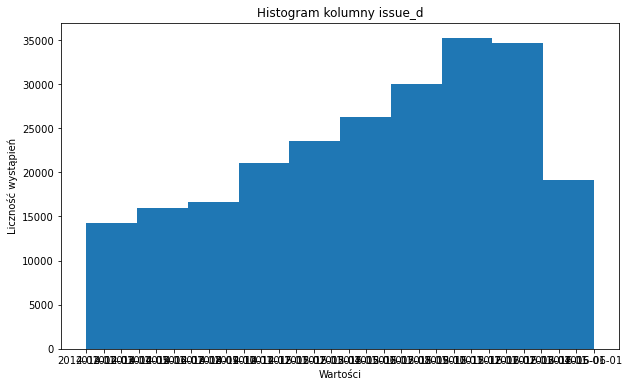

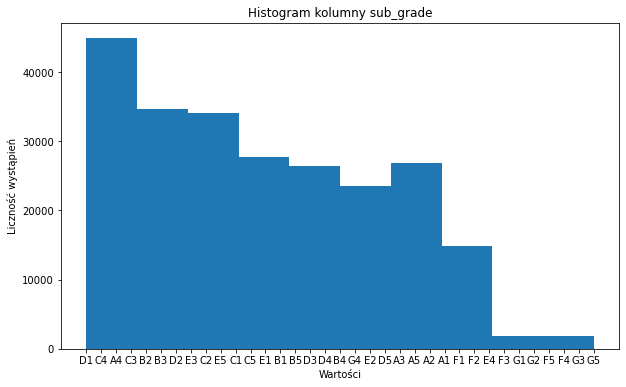

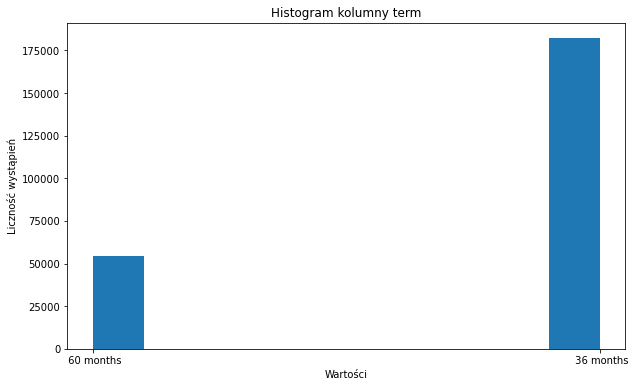

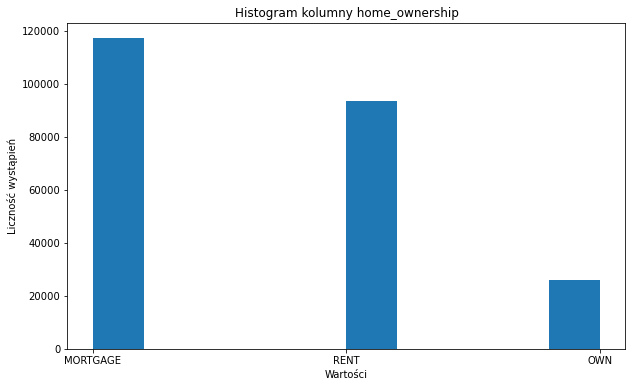

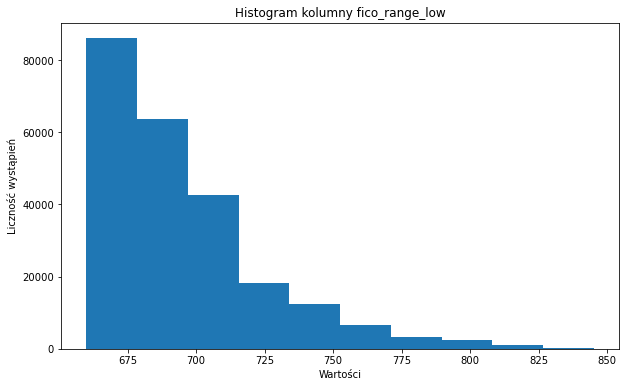

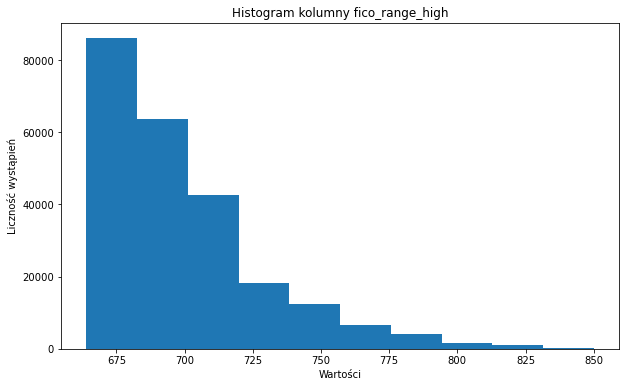

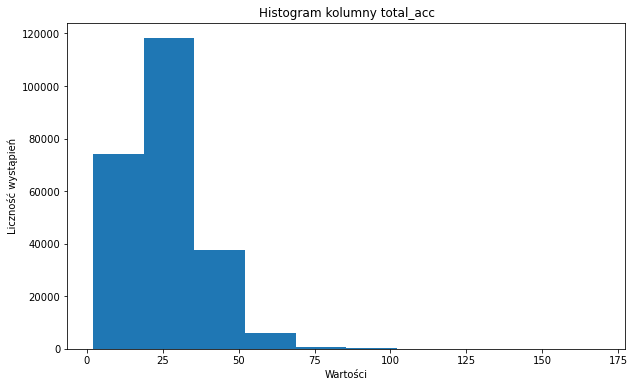

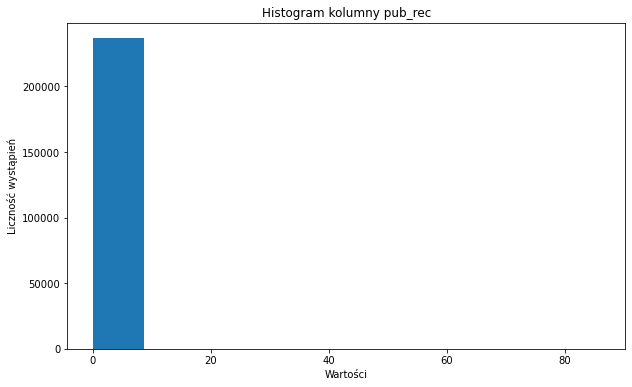

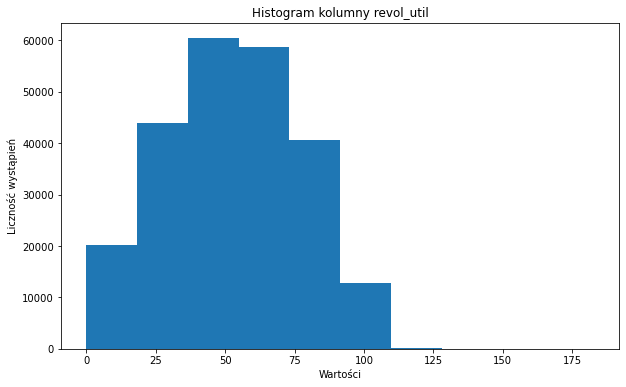

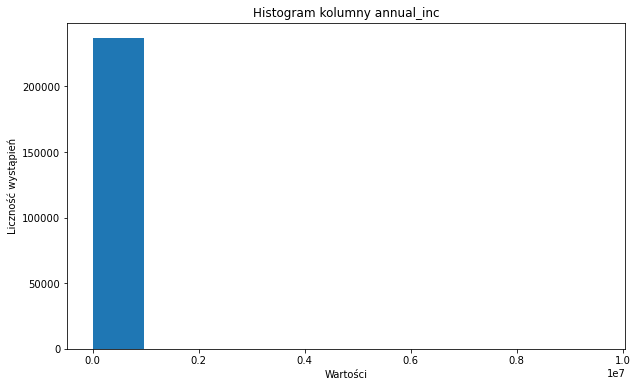

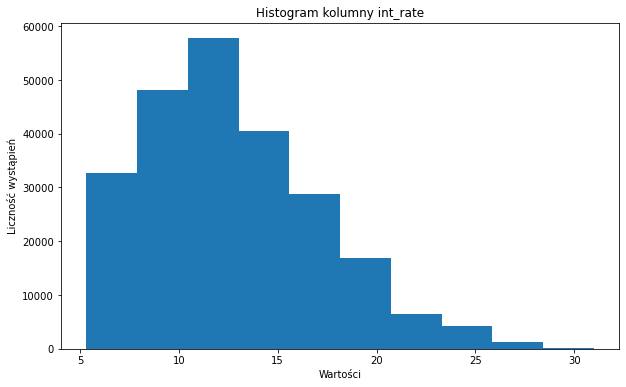

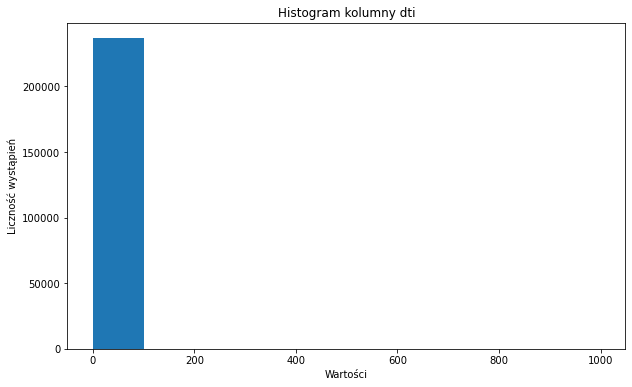

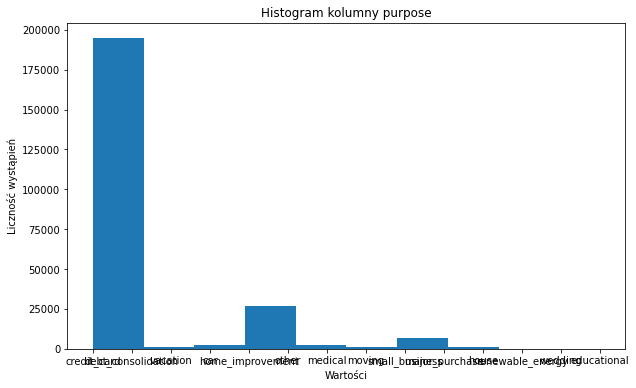

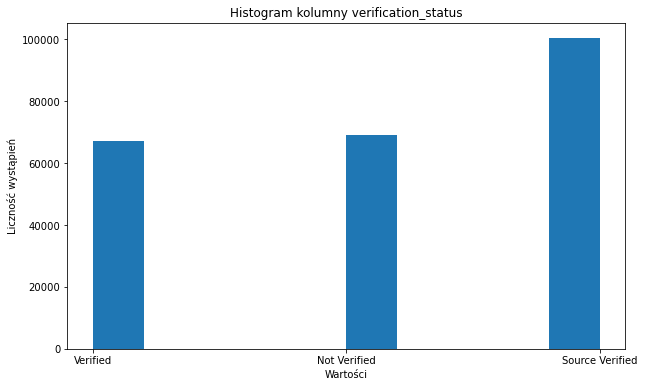

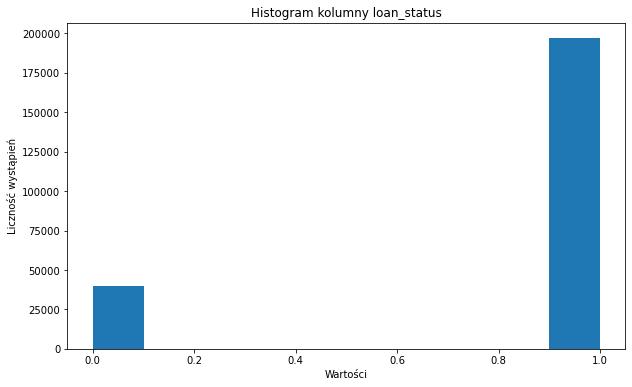

In [49]:
for column in df.columns:
    plt.figure(figsize=(10, 6))
    plt.hist(df[column], bins=10)
    plt.title(f'{column} histogram')
    plt.xlabel('Values')
    plt.ylabel('Occurances')
    plt.show()

<h1>Boxploty</h1>

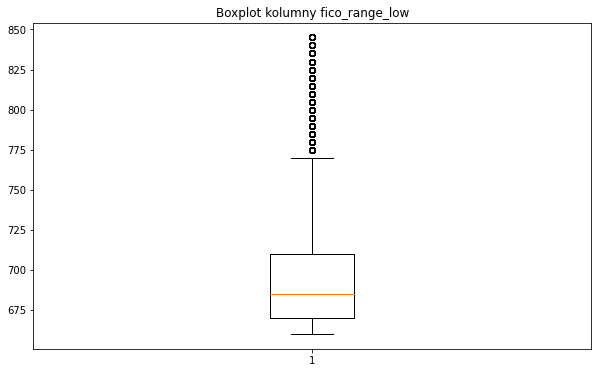

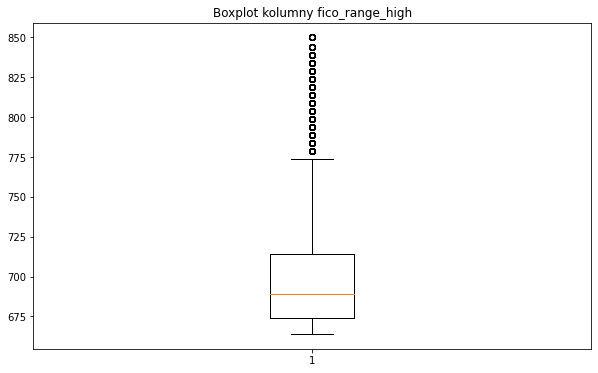

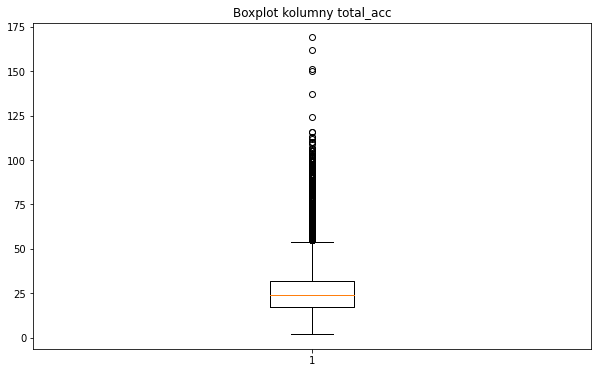

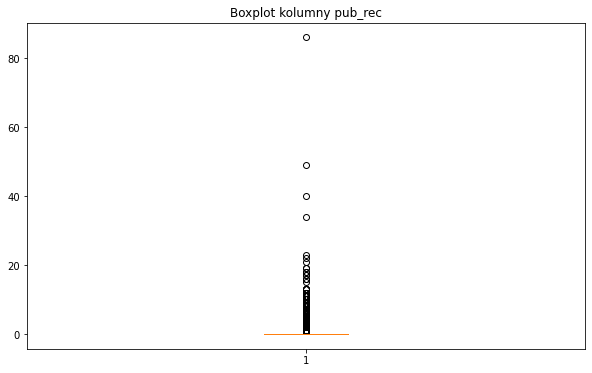

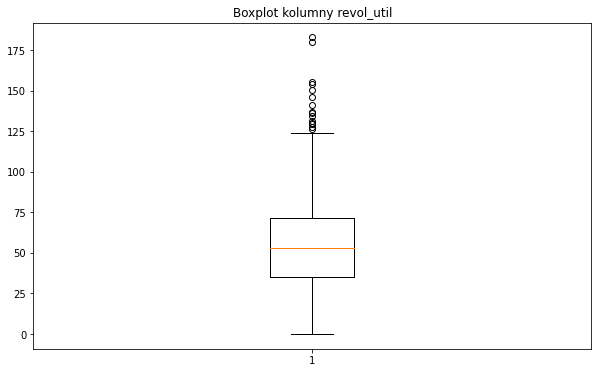

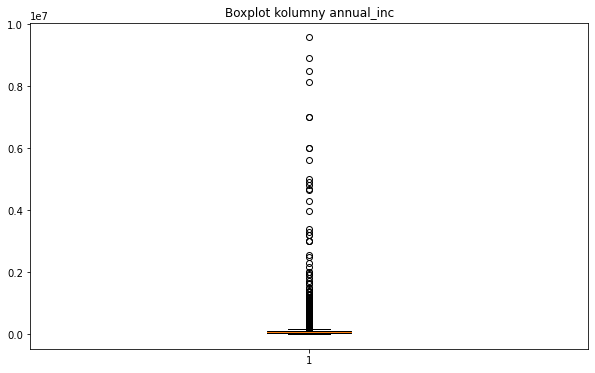

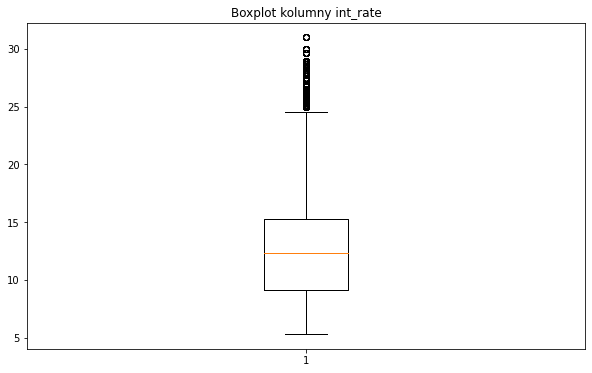

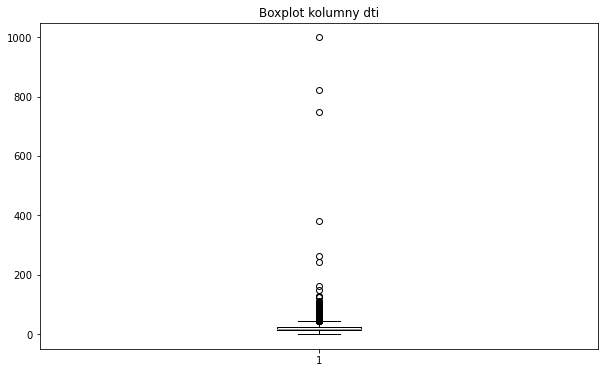

In [59]:
for column in quantitative_columns:
    plt.figure(figsize=(10, 6))
    plt.boxplot(df[column])
    plt.title(f'{column} boxplot')
    plt.show()

<h1>Wizualizacje danych w oparciu o bardziej zaawansowany wykres</h1>

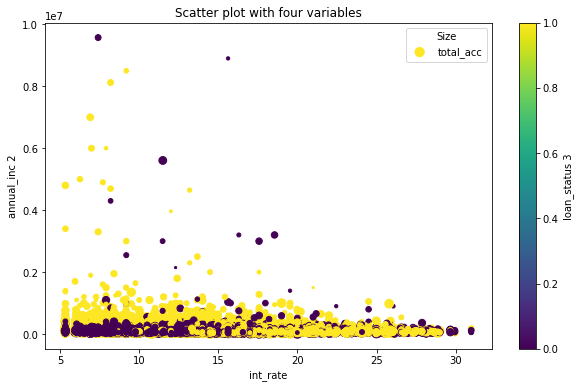

In [72]:
plt.figure(figsize=(10, 6))
plt.scatter(df['int_rate'], df['annual_inc'], c=df['loan_status'], s=df['total_acc'], label='total_acc')
plt.xlabel('int_rate')
plt.ylabel('annual_inc 2')
plt.colorbar(label='loan_status 3')
plt.title('Scatter plot with four variables')
plt.legend(title='Size')
plt.show()

<h1>Analiza danych bazując na pandas</h1>

In [115]:
home_loan_means = df.groupby('home_ownership')['loan_status'].mean().reset_index()
home_loan_means.columns = ['home_ownership', 'average loan status']
sorted_home_loan_means = home_loan_means.sort_values(by='average loan status', ascending=False)
sorted_home_loan_means

,home_ownership,average loan status
0,MORTGAGE,0.862120
1,OWN,0.821207
2,RENT,0.796234


Jest to porównanie jak często ludzie z różnym prawem własności do mieszkania- dostają pożyczkę. Wynika z tego, że ludzie, którzy posiadają kredyt hipoteczny najczęściej dostają pożyczkę, a osoby, które wynajmują mieszkanie- najrzadziej.  

<h1>DLA CB PATRYK</h1>

<h1>Analiza pairplotów (jeśli macie Państwo dużo danych można wyrysować mniej - będzie się zlewało na pairplocie, albo np. policzyć współczynniki korelacji Pearsona/Spearmana) </h1>

<h1>Proszę zastanowić się nad cechami jakie macie Państwo w zbiorze, tj. czy jakieś należy ze sobą zestawić, podzielić przez siebie etc, co robić z timestamp, co robić z danymi typu string itp.</h1>

<h1>JESZCZE JAKBYS MOGL TO Do każdego wykresu/współczynnika proszę o komentarz. - NIE DO WSZYSTKIEGO DAŁEM KOMENTARZ</h1>